In [19]:
from inventory_simulator import InventorySimulator
import numpy as np
from scipy import stats


In [20]:
def format_percentage(input_ratio):
    """Takes an input ratio, formats it as percentage and caps it between 0 and 100%"""
    input_ratio_capped = min(1, input_ratio)
    input_ratio_capped = max(0, input_ratio_capped)
    rounded_value = round(input_ratio_capped * 100,2)
    return f"{rounded_value} %"

## Run a Single Simulation

In [21]:
demand_input = 10 * 10 ** 4  # Made them bigger to make the costs make sense
demand_std_input = 20 * 10 ** 4
sim = InventorySimulator(yearly_demand_mean=demand_input,
                         yearly_demand_deviation=demand_std_input,
                         vendor_lead_time_mean=4,
                         vendor_lead_time_deviation=0.8,
                         single_transaction_fixed_cost=50,
                         variable_transaction_cost=0.25,
                         holding_cost=0.1,
                         stockout_cost=0.1,
                         review_periods=[7],
                         min_order_size=50,
                         confidence_level=0.95)

In [22]:
# Simulate
days_to_simulate = 180
sim.simulate(days_to_simulate)

In [23]:
# Show the simulation results as a df
sim.show_sim_results_as_df()

,Inventory,Demand,Sales,Lost Sales,Order Arrivals,Order Requests
0,4844.196503,0.000000,0.000000,0.0,0.0,0.0
1,4564.424686,279.771816,279.771816,0.0,0.0,0.0
2,4550.416262,14.008425,14.008425,0.0,0.0,0.0
3,4550.416262,0.000000,0.000000,0.0,0.0,0.0
4,3954.650336,595.765926,595.765926,0.0,0.0,0.0
...,...,...,...,...,...,...
175,1704.614202,0.000000,0.000000,0.0,0.0,3150.0
176,1696.359295,8.254908,8.254908,0.0,0.0,0.0
177,1329.034446,367.324849,367.324849,0.0,0.0,0.0
178,761.618351,567.416095,567.416095,0.0,0.0,0.0


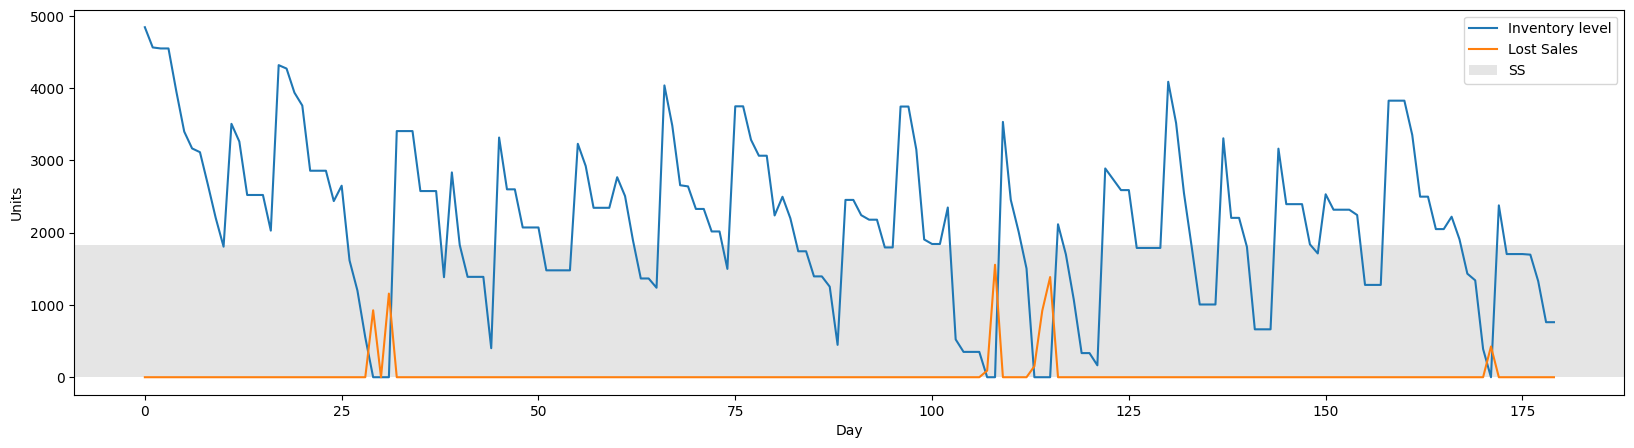

In [24]:
# Based on the current simulation results plots the inventory and stock outs
sim.plot_results()

In [25]:
fill_rate, total_service_level, daily_stock_out = sim.calculate_metrics()

# Print variable names and their values
print("fill_rate:", format_percentage(fill_rate))
print("total_service_level:", format_percentage(total_service_level))
print("daily_stock_out:", format_percentage(daily_stock_out))

fill_rate: 90.45 %
total_service_level: 84.0 %
daily_stock_out: 95.0 %


# Run N simulations

In [26]:
# Run simulation n times
num_simulations = 10
num_parameters = 3

# Empty array to store results
results = np.empty((num_simulations, num_parameters))

# Run simulations, and store metrics
for i in range(num_simulations):

    sim.simulate(days_to_simulate)
    # Run your simulation and obtain parameters a, b, c
    result_metrics = sim.calculate_metrics()

    # Store the results in the corresponding row of the array
    results[i] = [*result_metrics]


In [27]:
confidence_intervals = []

for i in range(results.shape[1]):
    c_i = stats.t.interval(sim.confidence_level, len(results[i]) - 1, loc=np.mean(results[i]), scale=stats.sem(results[i]))
    confidence_intervals.append(c_i)

# Print variable names and their values
print("fill_rate between:",format_percentage(confidence_intervals[0][0]), "and",format_percentage(confidence_intervals[0][1]))
print("total_service between:",format_percentage(confidence_intervals[1][0]), "and",format_percentage(confidence_intervals[1][1]))
print("daily_stock_out between:",format_percentage(confidence_intervals[2][0]), "and",format_percentage(confidence_intervals[2][1]))

fill_rate between: 63.37 % and 100 %
total_service between: 29.51 % and 100 %
daily_stock_out between: 65.65 % and 100 %
